### Summary

1. ipar_maize_yield_2014 data loaded, and ndvis exploded to different rows and converted to floats. An extra column, representing number of weeks, was added (nth_8days) to facilitate merge with the weather data.<br>
**file used:** 'IPAR_yields_with_NDVI - Maize_2014NEW.csv. **output file:** 'ipar_with_ndvi_maize_8daywk.csv'<br>
<br>
2. Weather data loaded and 2014 data separated.<br>
**files used:** weather_2010_2014_8dayweek loaded.<br>
<br>
3. Merged data of ipar_yields and weather_2014.<br>
**ouputfile:** 'test_merge_maize2014_3Jan21.csv<br>
<br>
4. Next step: ONLY output data from merged file for weeks 19 - 30(period just before harvest and after planting). This file to be used for modeling.

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#pd.set_option('display.max_rows', None)

### Load IPAR Maize data and Edit

In [2]:
df = pd.read_csv('IPAR_yields_with_NDVI - Maize_2014NEW.csv')

In [3]:
df.head()

,KEY,ID_menage,crops_cult5,season_cult5,Area_cult5 (ha),QuantityProduced_cult5 (kg),Yield,Department,Counties,Village,gpslat,gpslon,ndvi
0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,"[0.27353909611701965, 0.26804202795028687, 0.2..."
1,uuid:000be421-3444-486e-8d1c-23514be2cbde,2.540000e+36,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,"[0.41235876083374023, 0.4080786108970642, 0.39..."
2,uuid:00340f33-3cc3-4cfa-a829-f44c28bacf13,3.410000e+37,Maize,1,1.0,200.0,0.2,KOUNGHEUL,MISSIRAH WADENE,KEUR MALICK MARAM,NaN,NaN,NaN
3,uuid:0139318c-52a7-4b72-9c73-374168f46200,1.390000e+38,Maize,1,1.0,1000.0,1.0,SEDHIOU,DIENDE,DIATOUMA MANDINGUE,12.788813,-15.584448,"[0.4192521274089813, 0.3968570828437805, 0.377..."
4,uuid:016476e7-f902-4866-b9af-f78bb26b8e3d,1.650000e+38,Maize,1,1.0,1300.0,1.3,VELINGARA,MEDINA GOUNASS,MEDINA TOUAT,13.257797,-13.801437,"[0.3422392010688782, 0.3186202347278595, 0.315..."


In [4]:
df.dropna(inplace=True) # drop Nan rows
df = df.reset_index()

In [5]:
df.head()

,index,KEY,ID_menage,crops_cult5,season_cult5,Area_cult5 (ha),QuantityProduced_cult5 (kg),Yield,Department,Counties,Village,gpslat,gpslon,ndvi
0,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,"[0.27353909611701965, 0.26804202795028687, 0.2..."
1,1,uuid:000be421-3444-486e-8d1c-23514be2cbde,2.540000e+36,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,"[0.41235876083374023, 0.4080786108970642, 0.39..."
2,3,uuid:0139318c-52a7-4b72-9c73-374168f46200,1.390000e+38,Maize,1,1.0,1000.0,1.0,SEDHIOU,DIENDE,DIATOUMA MANDINGUE,12.788813,-15.584448,"[0.4192521274089813, 0.3968570828437805, 0.377..."
3,4,uuid:016476e7-f902-4866-b9af-f78bb26b8e3d,1.650000e+38,Maize,1,1.0,1300.0,1.3,VELINGARA,MEDINA GOUNASS,MEDINA TOUAT,13.257797,-13.801437,"[0.3422392010688782, 0.3186202347278595, 0.315..."
4,5,uuid:01b4707d-12bb-4b6b-9f63-14a49420eced,1.250000e+38,Maize,1,1.0,100.0,0.1,BOUNKILING,FAOUNE,Touba Mouride,13.065142,-15.624235,"[0.3898445963859558, 0.3708401322364807, 0.351..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 818 entries, 0 to 817
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        818 non-null    int64  
 1   KEY                          818 non-null    object 
 2   ID_menage                    818 non-null    float64
 3   crops_cult5                  818 non-null    object 
 4   season_cult5                 818 non-null    int64  
 5   Area_cult5 (ha)              818 non-null    float64
 6   QuantityProduced_cult5 (kg)  818 non-null    float64
 7   Yield                        818 non-null    float64
 8   Department                   818 non-null    object 
 9   Counties                     818 non-null    object 
 10  Village                      818 non-null    object 
 11  gpslat                       818 non-null    float64
 12  gpslon                       818 non-null    float64
 13  ndvi                

In [7]:
df.head()

,index,KEY,ID_menage,crops_cult5,season_cult5,Area_cult5 (ha),QuantityProduced_cult5 (kg),Yield,Department,Counties,Village,gpslat,gpslon,ndvi
0,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,"[0.27353909611701965, 0.26804202795028687, 0.2..."
1,1,uuid:000be421-3444-486e-8d1c-23514be2cbde,2.540000e+36,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,"[0.41235876083374023, 0.4080786108970642, 0.39..."
2,3,uuid:0139318c-52a7-4b72-9c73-374168f46200,1.390000e+38,Maize,1,1.0,1000.0,1.0,SEDHIOU,DIENDE,DIATOUMA MANDINGUE,12.788813,-15.584448,"[0.4192521274089813, 0.3968570828437805, 0.377..."
3,4,uuid:016476e7-f902-4866-b9af-f78bb26b8e3d,1.650000e+38,Maize,1,1.0,1300.0,1.3,VELINGARA,MEDINA GOUNASS,MEDINA TOUAT,13.257797,-13.801437,"[0.3422392010688782, 0.3186202347278595, 0.315..."
4,5,uuid:01b4707d-12bb-4b6b-9f63-14a49420eced,1.250000e+38,Maize,1,1.0,100.0,0.1,BOUNKILING,FAOUNE,Touba Mouride,13.065142,-15.624235,"[0.3898445963859558, 0.3708401322364807, 0.351..."


#### Strip/split and explode ndvi values to fill rows:

In [8]:
#For sptripping at '[]' and ']'
df['ndvi'] = df['ndvi'].str.strip('[]')

In [9]:
#For splitting at ","
df["ndvi"] = df["ndvi"].str.split(",") 

In [10]:
df1 = df.explode('ndvi').reset_index(drop=True)

In [11]:
df1.head()

,index,KEY,ID_menage,crops_cult5,season_cult5,Area_cult5 (ha),QuantityProduced_cult5 (kg),Yield,Department,Counties,Village,gpslat,gpslon,ndvi
0,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.27353909611701965
1,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.26804202795028687
2,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.2619583010673523
3,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.2600390613079071
4,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.24942319095134735


In [12]:
df1['ndvi'] = df1.ndvi.astype('float') #convert ndvi to floats

In [13]:
df1.head()

,index,KEY,ID_menage,crops_cult5,season_cult5,Area_cult5 (ha),QuantityProduced_cult5 (kg),Yield,Department,Counties,Village,gpslat,gpslon,ndvi
0,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.273539
1,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.268042
2,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.261958
3,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.260039
4,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.249423


#### Insert 8-week day column (to match with available weather data):

In [14]:
s = pd.Series([w for w in range(1,47)])

In [15]:
df1['nth_8days'] = pd.concat([s]*818, ignore_index=True) # add column numbered by weeks
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37628 entries, 0 to 37627
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   index                        37628 non-null  int64  
 1   KEY                          37628 non-null  object 
 2   ID_menage                    37628 non-null  float64
 3   crops_cult5                  37628 non-null  object 
 4   season_cult5                 37628 non-null  int64  
 5   Area_cult5 (ha)              37628 non-null  float64
 6   QuantityProduced_cult5 (kg)  37628 non-null  float64
 7   Yield                        37628 non-null  float64
 8   Department                   37628 non-null  object 
 9   Counties                     37628 non-null  object 
 10  Village                      37628 non-null  object 
 11  gpslat                       37628 non-null  float64
 12  gpslon                       37628 non-null  float64
 13  ndvi            

In [16]:
df1.head()

,index,KEY,ID_menage,crops_cult5,season_cult5,Area_cult5 (ha),QuantityProduced_cult5 (kg),Yield,Department,Counties,Village,gpslat,gpslon,ndvi,nth_8days
0,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.273539,1
1,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.268042,2
2,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.261958,3
3,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.260039,4
4,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.249423,5


In [17]:
df1.describe()

,index,ID_menage,season_cult5,Area_cult5 (ha),QuantityProduced_cult5 (kg),Yield,gpslat,gpslon,ndvi,nth_8days
count,37628.000000,3.762800e+04,37628.000000,37628.000000,37628.000000,37628.000000,37628.000000,37628.000000,37628.000000,37628.000000
mean,451.594132,4.586866e+39,1.070905,1.371883,1039.201589,0.746636,13.479798,-15.113251,0.357580,23.500000
std,260.036595,2.539368e+39,0.363174,1.633443,2359.898379,0.711874,0.810071,0.944399,0.142651,13.276094
min,0.000000,2.540000e+36,1.000000,0.010000,0.900000,0.000450,12.388267,-16.738723,0.093437,1.000000
25%,225.000000,2.410000e+39,1.000000,0.500000,216.000000,0.300000,12.896657,-15.863258,0.251417,12.000000
50%,453.500000,4.520000e+39,1.000000,1.000000,550.000000,0.600000,13.214058,-15.459357,0.311390,23.500000
75%,674.000000,6.490000e+39,1.000000,1.500000,1100.000000,1.000000,13.836127,-14.196923,0.438742,35.000000
max,903.000000,9.940000e+39,3.000000,25.000000,50000.000000,8.000000,16.514580,-12.946617,0.782882,46.000000


#### Rename columns and output csv

In [18]:
# rename some columns
df1.rename(columns = {'Area_cult5 (ha)':'area_cult5_ha', 
                      'QuantityProduced_cult5 (kg)':'quantityproduced_cult5_kg',
           'Yield':'yield', 'Department':'department',
           'Counties':'counties', 'Village':'village'},inplace = True)

In [19]:
df1.columns

Index(['index', 'KEY', 'ID_menage', 'crops_cult5', 'season_cult5',
       'area_cult5_ha', 'quantityproduced_cult5_kg', 'yield', 'department',
       'counties', 'village', 'gpslat', 'gpslon', 'ndvi', 'nth_8days'],
      dtype='object')

#### output file for merge with weather data

In [52]:
df1.head() # check week count is ascending order

,index,KEY,ID_menage,crops_cult5,season_cult5,area_cult5_ha,quantityproduced_cult5_kg,yield,department,counties,village,gpslat,gpslon,ndvi,nth_8days
0,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.273539,1
1,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.268042,2
2,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.261958,3
3,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.260039,4
4,0,uuid:0003a9b4-9afb-4ff0-8efa-0fabbdb83ccb,3.190000e+36,Maize,1,0.5,400.0,0.8,KAOLACK,THIARE,MAKA FASS,13.988077,-15.839605,0.249423,5


In [20]:
#df1.to_csv('ipar_with_ndvi_maize_8daywk.csv', index=False)

In [32]:
df1.shape

(37628, 15)

In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37628 entries, 0 to 37627
Data columns (total 15 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   index                      37628 non-null  int64  
 1   KEY                        37628 non-null  object 
 2   ID_menage                  37628 non-null  float64
 3   crops_cult5                37628 non-null  object 
 4   season_cult5               37628 non-null  int64  
 5   area_cult5_ha              37628 non-null  float64
 6   quantityproduced_cult5_kg  37628 non-null  float64
 7   yield                      37628 non-null  float64
 8   department                 37628 non-null  object 
 9   counties                   37628 non-null  object 
 10  village                    37628 non-null  object 
 11  gpslat                     37628 non-null  float64
 12  gpslon                     37628 non-null  float64
 13  ndvi                       37628 non-null  flo

In [35]:
d = pd.read_csv('ipar_with_ndvi_maize_8daywk.csv')

In [37]:
w = pd.read_csv('senegal_weather_8days_2010_2019.csv')
w.columns

Index(['year', 'nth_8days', 'gpslat', 'gpslon', 'temp', 'rel_hum', 'hum',
       'wind_speed', 'wind_dir', 'solar_radiat', 'thermal_radiat',
       'dir_solar_radiat', 'soil_1', 'soil_2', 'soil_3', 'soil_4', 'pr'],
      dtype='object')

In [71]:
w.shape

(683100, 17)

In [53]:
#get only 2014 data
weather2014 = w[w['year'] == 2014].reset_index()
weather2014.shape

(68310, 18)

In [54]:
weather2014.groupby(['gpslat','gpslon']).count().head() # some duplicate inputs of same position( 92 instead of 46)

,,index,year,nth_8days,temp,rel_hum,hum,wind_speed,wind_dir,solar_radiat,thermal_radiat,dir_solar_radiat,soil_1,soil_2,soil_3,soil_4,pr
gpslat,gpslon,,,,,,,,,,,,,,,,
12.388267,-16.738473,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92,92
12.388443,-16.738210,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12.388468,-16.738495,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12.388678,-16.738723,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12.390720,-16.737082,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46


In [55]:
weather2014.head()

,index,year,nth_8days,gpslat,gpslon,temp,rel_hum,hum,wind_speed,wind_dir,solar_radiat,thermal_radiat,dir_solar_radiat,soil_1,soil_2,soil_3,soil_4,pr
0,184,2014,1,12.749203,-16.04972,25.09375,0.41875,26.96750,2.67375,77.54750,225.250,348.875,164.50125,24.73625,24.90875,25.33500,27.25125,0.0
1,185,2014,2,12.749203,-16.04972,24.87625,0.49625,28.06125,2.09750,123.65500,231.375,349.625,177.43000,25.15125,25.33500,25.57375,26.99375,0.0
2,186,2014,3,12.749203,-16.04972,24.21750,0.44750,26.17000,3.03875,53.55250,240.250,343.500,185.26750,24.62500,24.84375,25.54000,26.79500,0.0
3,187,2014,4,12.749203,-16.04972,25.78000,0.39250,27.51250,2.83000,145.15125,248.375,347.375,192.06625,26.08125,25.92125,25.78375,26.62250,0.0
4,188,2014,5,12.749203,-16.04972,25.97625,0.30875,26.19875,3.11250,35.17000,255.750,337.125,195.11750,25.39125,25.60125,25.81125,26.51250,0.0


In [56]:
weather_2014 = weather2014.drop_duplicates(['gpslat', 'gpslon', 'nth_8days']) # drop duplicated rows

In [57]:
weather_2014.shape

(47518, 18)

In [58]:
weather_2014.groupby(['gpslat','gpslon']).count().head() # duplicates eliminated

,,index,year,nth_8days,temp,rel_hum,hum,wind_speed,wind_dir,solar_radiat,thermal_radiat,dir_solar_radiat,soil_1,soil_2,soil_3,soil_4,pr
gpslat,gpslon,,,,,,,,,,,,,,,,
12.388267,-16.738473,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12.388443,-16.738210,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12.388468,-16.738495,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12.388678,-16.738723,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12.390720,-16.737082,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46


In [59]:
weather_2014.head()

,index,year,nth_8days,gpslat,gpslon,temp,rel_hum,hum,wind_speed,wind_dir,solar_radiat,thermal_radiat,dir_solar_radiat,soil_1,soil_2,soil_3,soil_4,pr
0,184,2014,1,12.749203,-16.04972,25.09375,0.41875,26.96750,2.67375,77.54750,225.250,348.875,164.50125,24.73625,24.90875,25.33500,27.25125,0.0
1,185,2014,2,12.749203,-16.04972,24.87625,0.49625,28.06125,2.09750,123.65500,231.375,349.625,177.43000,25.15125,25.33500,25.57375,26.99375,0.0
2,186,2014,3,12.749203,-16.04972,24.21750,0.44750,26.17000,3.03875,53.55250,240.250,343.500,185.26750,24.62500,24.84375,25.54000,26.79500,0.0
3,187,2014,4,12.749203,-16.04972,25.78000,0.39250,27.51250,2.83000,145.15125,248.375,347.375,192.06625,26.08125,25.92125,25.78375,26.62250,0.0
4,188,2014,5,12.749203,-16.04972,25.97625,0.30875,26.19875,3.11250,35.17000,255.750,337.125,195.11750,25.39125,25.60125,25.81125,26.51250,0.0


In [61]:
# merge yields and weather for KAFFRINE, Only for common years!
test_merge_inner = pd.merge(df1, weather_2014, on=['gpslat','gpslon', 'nth_8days'], how='inner', indicator=True)
test_merge_inner.shape
#test_merge_inner.head()

(31326, 31)

In [64]:
test_merge_inner.iloc[2000:2049,3:16]

,crops_cult5,season_cult5,area_cult5_ha,quantityproduced_cult5_kg,yield,department,counties,village,gpslat,gpslon,ndvi,nth_8days,index_y
2000,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.160862,23,22286
2001,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.166645,24,22287
2002,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.183926,25,22288
2003,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.182355,26,22289
2004,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.179297,27,22290
2005,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.161801,28,22291
2006,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.204534,29,22292
2007,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.234921,30,22293
2008,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.205418,31,22294
2009,Maize,3,0.25,200.0,0.80,MATAM,NABADJI-CIVOL,H2 GOUREL DEMBA RACINE,15.840262,-13.306732,0.187548,32,22295


In [66]:
test_merge_inner.iloc[0:49,3:16]

,crops_cult5,season_cult5,area_cult5_ha,quantityproduced_cult5_kg,yield,department,counties,village,gpslat,gpslon,ndvi,nth_8days,index_y
0,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.412359,1,184
1,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.408079,2,185
2,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.393177,3,186
3,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.383683,4,187
4,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.357254,5,188
5,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.334809,6,189
6,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.330319,7,190
7,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.314368,8,191
8,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.318050,9,192
9,Maize,1,0.5,200.0,0.4,BIGNONA,OUONCK,GHAMOUNE BOULANDOR,12.749203,-16.049720,0.318512,10,193


In [67]:
#test_merge_inner.to_csv('test_merge_maize2014_3Jan21.csv')

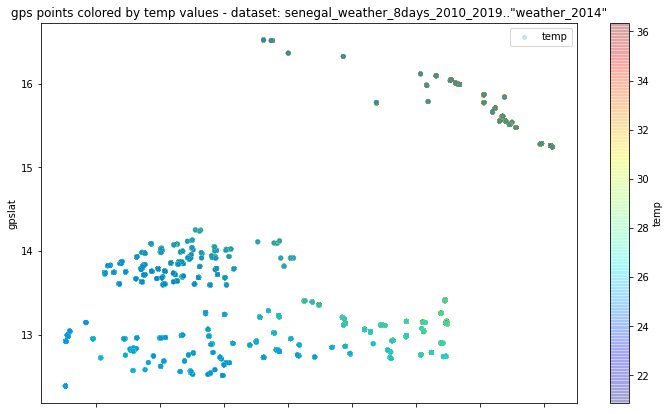

In [68]:
# Map of weather points in the Senegal
weather_2014.plot(kind='scatter', x='gpslon', y='gpslat', alpha=0.2, label='temp',
         s=14,
            c='temp', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(12,7))
plt.title('gps points colored by temp values - dataset: senegal_weather_8days_2010_2019.."weather_2014"')
plt.legend()
#plt.savefig('accidents_map.png')
plt.show();


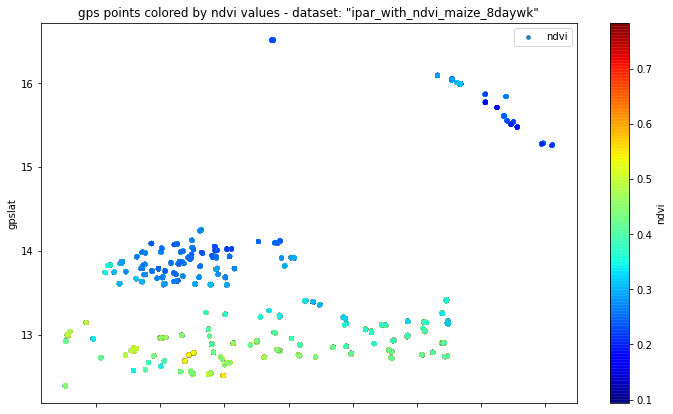

In [73]:
df1.plot(kind='scatter', x='gpslon', y='gpslat', alpha=0.9, label='ndvi',
         s=14,
            c='ndvi', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(12,7))
plt.title('gps points colored by ndvi values - dataset: "ipar_with_ndvi_maize_8daywk"')
plt.legend()
#plt.savefig('accidents_map.png')
plt.show();

In [124]:
df1['ndvi'] = df1.ndvi.astype('float')

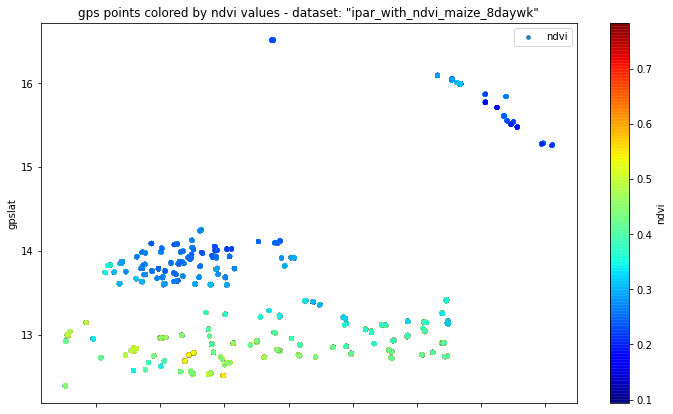

In [146]:
df1.plot(kind='scatter', x='gpslon', y='gpslat', alpha=0.9, label='ndvi',
         s=14,
            c='ndvi', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(12,7))

plt.title('gps points colored by ndvi values - dataset: "ipar_with_ndvi_maize_8daywk"')
plt.legend()

#plt.savefig('accidents_map.png')
plt.show();

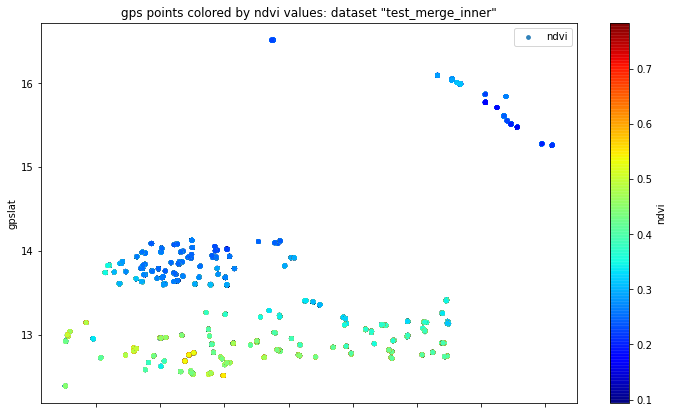

In [145]:
test_merge_inner.plot(kind='scatter', x='gpslon', y='gpslat', alpha=0.9, label='ndvi',
         s=14,
            c='ndvi', cmap=plt.get_cmap('jet'), colorbar=True, figsize=(12,7))

plt.title('gps points colored by ndvi values - dataset: "test_merge_inner"')
plt.legend()

#plt.savefig('test_merge_pts_map.png')
plt.show();

In [138]:
len(test_merge_inner)

51244

In [139]:
len(df1) # ipar_yields data file.

37628

In [157]:
len(weather_2014)

68310